In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:


import os, cv2, math
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
import pickle
from tensorflow.keras.callbacks import TensorBoard

import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn. model_selection import train_test_split
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow_hub as hub
from tensorflow.keras.layers import BatchNormalization

#import Alla package

In [ ]:
import pickle
import numpy as np
import numpy as np
import time
import sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from keras import optimizers
# import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from mlxtend.plotting import plot_decision_regions

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import os, cv2, math
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time
import datetime
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import LSTM




#Atsu Segmentation

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import json
def Atsu_Segmentation(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.title("gray")
    plt.show()
    th=50
    lower_values = np.array((0, 138, 67), dtype="uint8")
    upper_values = np.array((255, 173, 133), dtype="uint8")
    #YCbCr_image = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    ret, thresh = cv2.threshold(gray, th, 255,   cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    r_image = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    mask_r = cv2.inRange(r_image, lower_values, upper_values)
    image = cv2.erode(mask_r , None, iterations=3)  # remove noise
    image_mask=image
    image_mask1=image
    image_mask1[image== 1] = 2
    image_mask1[image== 0]=1
    image_mask1[image== 2]=0
    bit_and_otsu=cv2.bitwise_and(image_mask1, thresh)
    plt.imshow(bit_and_otsu)
    #print(bit_and)


    #Morphology
    thresh=bit_and_otsu
    kernel = np.ones((2, 2), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
  

    sure_bg = cv2.dilate(opening, kernel, iterations=4)
    
    ret, image_background = cv2.threshold(sure_bg, 1, 128,
                               cv2.THRESH_BINARY)
 
    sure_fg=opening
    sure_fg = np.uint8(sure_fg)
    #unknown = cv2.subtract(sure_bg, sure_fg)
    unknown = cv2.add(image_background, sure_fg)

    # Marker labelling
    #m=sure_fg
    #m[sure_fg==1]=2
    #m[sure_fg==0]=1
    #m[sure_fg==2]=1
    image_marker32= np.int32(unknown)
    a=cv2.watershed(img, image_marker32)
  
    image_marker32= np.int32(a)
    m = cv2.convertScaleAbs(image_marker32)  # convert back to uint8
    ret, image_mask = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    output = cv2.bitwise_and(img, img, mask=image_mask)
    #output_1=output
    #output_1[output==0]=255
    #plt.imshow(output_1)
    #plt.title("output")
    #plt.show()
    #f = open("out.json", "w")
    #f.write(json.dumps(output.tolist(), indent=4))
    #f.close()
    #plt.hist(output.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
    #plt.show()


    return output

#making Pickle/  Training Data

In [ ]:
#Directory="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/Five_sign_word"
Directory="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/TrainJpw"
Categories=['Call', 'Close', 'Cold', 'Correct', 'Fine', 'Help', 'Home', 'ILoveYou', 'Like', 'Love', 'No', 'Ok', 'Please', 'Single', 'Sit', 'Tall', 'Wash', 'Work', 'Yes', 'You']
IMAGE_SIZE=60

training_data = []
i=0
for c in Categories:
    folder = os.path.join(Directory,c)
    index = Categories.index(c)
    
    for img in os.listdir(folder):
        image= os.path.join(folder,img)
        img_arr=cv2.imread(image)
        #detector = skinDetector(image)
        #img_arr = detector.find_skin()
        img_arr=cv2.resize(img_arr,(IMAGE_SIZE,IMAGE_SIZE))
        training_data.append([img_arr, index])
        #print(i)
        i=i+1
import random
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample[1])


B38TrX=[]
B38Try=[]
for features, label in training_data:
    B38TrX.append(features)
    B38Try.append(label)
tswX=np.array(B38TrX)
tswy=np.array(B38Try)

import pickle
pickle_out=open("/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/tswX.pickle", "wb")
pickle.dump(tswX,pickle_out)
pickle_out.close()


pickle_out=open("/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/tswy.pickle", "wb")
pickle.dump(tswy,pickle_out)
pickle_out.close()


2
14
16
2
1


#Training Data with Augmentation

In [ ]:
from numpy import expand_dims
#Directory="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/Five_sign_word"
Directory="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/TrainJpw"
Categories=['Call', 'Close', 'Cold', 'Correct', 'Fine', 'Help', 'Home', 'ILoveYou', 'Like', 'Love', 'No', 'Ok', 'Please', 'Single', 'Sit', 'Tall', 'Wash', 'Work', 'Yes', 'You']
Img_size=60
Channel=3

training_data = []
i=0
for c in Categories:
    folder = os.path.join(Directory,c)
    index = Categories.index(c)
    
    for img in os.listdir(folder):
        image= os.path.join(folder,img)
        img_arr=cv2.imread(image)
        #detector = skinDetector(image)
        #img_arr = detector.find_skin()
        img_resized=cv2.resize(img_arr,(Img_size,Img_size))
        training_data.append([img_resized, index])
        
        img_resized= expand_dims(img_resized, 0)
        img_resized = expand_dims(img_resized, 3)
        #print(img_resized.shape)
        img_resized = img_resized.reshape(1, Img_size, Img_size, Channel)

        datagenrot = ImageDataGenerator(rotation_range=39)
        igr = datagenrot.flow(img_resized, batch_size=1)



        datagenscal = ImageDataGenerator(zoom_range = .50)
        igs = datagenscal.flow(img_resized, batch_size=1)

        datagentrans = ImageDataGenerator(shear_range=-0.8)
        igt = datagentrans.flow(img_resized, batch_size=1)

        #datagentransshift = ImageDataGenerator(height_shift_range=0.2)
        datagentransshift = ImageDataGenerator(width_shift_range=-0.3)
        igtshift = datagentransshift.flow(img_resized, batch_size=1)
        for i in range(3):
            batch1 = igr.next()
            Images = batch1[0].astype('uint8')
            Images=Images.reshape(Img_size, Img_size, Channel)
            training_data.append([Images, index])


            batch3 = igs.next()
            Images = batch3[0].astype('uint8')
            Images = Images.reshape(Img_size, Img_size, Channel)
            training_data.append([Images, index])

            #plt.imshow(Images)
            #plt.show()

            batch2 = igt.next()
            Images = batch2[0].astype('uint8')
            Images = Images.reshape(Img_size, Img_size, Channel)
            training_data.append([Images, index])

            # plt.imshow(Images)
            #plt.show()
            #break
            batch4 = igtshift.next()
            Images = batch4[0].astype('uint8')
            Images = Images.reshape(Img_size, Img_size, Channel)
            training_data.append([Images, index])

         

        #print(i)
        i=i+1


import random
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample[1])


B38TrX=[]
B38Try=[]
for features, label in training_data:
    B38TrX.append(features)
    B38Try.append(label)
tswX_aug=np.array(B38TrX)
tswy_aug=np.array(B38Try)

import pickle
pickle_out=open("/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/tswX_aug.pickle", "wb")
pickle.dump(tswX_aug,pickle_out)
pickle_out.close()


pickle_out=open("/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/tswy_aug.pickle", "wb")
pickle.dump(tswy_aug,pickle_out)
pickle_out.close()


15
0
3
1
16


#making Pickle/ Test Data

In [ ]:
Directory="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/TestJpw"
#Directory="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/Five_sign_word_Test"
Categories=['Call', 'Close', 'Cold', 'Correct', 'Fine', 'Help', 'Home', 'ILoveYou', 'Like', 'Love', 'No', 'Ok', 'Please', 'Single', 'Sit', 'Tall', 'Wash', 'Work', 'Yes', 'You']
IMAGE_SIZE=60

training_data = []
i=0
for c in Categories:
    folder = os.path.join(Directory,c)
    index = Categories.index(c)
    
    for img in os.listdir(folder):
        image= os.path.join(folder,img)
        img_arr=cv2.imread(image)
        #detector = skinDetector(image)
        #img_arr = detector.find_skin()
        img_arr=cv2.resize(img_arr,(IMAGE_SIZE,IMAGE_SIZE))
        training_data.append([img_arr, index])
        #print(i)
        i=i+1
import random
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample[1])


B38TrX=[]
B38Try=[]
for features, label in training_data:
    B38TrX.append(features)
    B38Try.append(label)
tswXTest=np.array(B38TrX)
tswyTest=np.array(B38Try)

import pickle
pickle_out=open("/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/tswXTest.pickle", "wb")
pickle.dump(tswXTest,pickle_out)
pickle_out.close()


pickle_out=open("/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/tswyTest.pickle", "wb")
pickle.dump(tswyTest,pickle_out)
pickle_out.close()


6
12
19
3
17


#Test_Augmented

In [ ]:
from numpy import expand_dims
Directory="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/TestJpw"
#Directory="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/Five_sign_word_Test"
Categories=['Call', 'Close', 'Cold', 'Correct', 'Fine', 'Help', 'Home', 'ILoveYou', 'Like', 'Love', 'No', 'Ok', 'Please', 'Single', 'Sit', 'Tall', 'Wash', 'Work', 'Yes', 'You']
Img_size=60

training_data = []
i=0
for c in Categories:
    folder = os.path.join(Directory,c)
    index = Categories.index(c)
    
    for img in os.listdir(folder):
        image= os.path.join(folder,img)
        img_arr=cv2.imread(image)
        #detector = skinDetector(image)
        #img_arr = detector.find_skin()
        img_resized=cv2.resize(img_arr,(Img_size,Img_size))
        training_data.append([img_resized, index])
        
        img_resized= expand_dims(img_resized, 0)
        img_resized = expand_dims(img_resized, 3)
        #print(img_resized.shape)
        img_resized = img_resized.reshape(1, Img_size, Img_size, Channel)

        datagenrot = ImageDataGenerator(rotation_range=39)
        igr = datagenrot.flow(img_resized, batch_size=1)



        datagenscal = ImageDataGenerator(zoom_range = .50)
        igs = datagenscal.flow(img_resized, batch_size=1)

        datagentrans = ImageDataGenerator(height_shift_range=0.2)
        igt = datagentrans.flow(img_resized, batch_size=1)

        #datagentransshift = ImageDataGenerator(height_shift_range=0.2)
        datagentransshift = ImageDataGenerator(width_shift_range=-0.3)
        igtshift = datagentransshift.flow(img_resized, batch_size=1)
        for i in range(3):
            batch1 = igr.next()
            Images = batch1[0].astype('uint8')
            Images=Images.reshape(Img_size, Img_size, Channel)
            training_data.append([Images, index])


            batch3 = igs.next()
            Images = batch3[0].astype('uint8')
            Images = Images.reshape(Img_size, Img_size, Channel)
            training_data.append([Images, index])

            #plt.imshow(Images)
            #plt.show()

            batch2 = igt.next()
            Images = batch2[0].astype('uint8')
            Images = Images.reshape(Img_size, Img_size, Channel)
            training_data.append([Images, index])

            # plt.imshow(Images)
            #plt.show()
            #break
            batch4 = igtshift.next()
            Images = batch4[0].astype('uint8')
            Images = Images.reshape(Img_size, Img_size, Channel)
            training_data.append([Images, index])

         

        #print(i)
        i=i+1


import random
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample[1])


B38TrX=[]
B38Try=[]
for features, label in training_data:
    B38TrX.append(features)
    B38Try.append(label)
tswX_aug_Test=np.array(B38TrX)
tswy_aug_Test=np.array(B38Try)

import pickle
pickle_out=open("/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/tswX_aug_Test.pickle", "wb")
pickle.dump(tswX_aug_Test,pickle_out)
pickle_out.close()


pickle_out=open("/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst/tswy_aug_Test.pickle", "wb")
pickle.dump(tswy_aug_Test,pickle_out)
pickle_out.close()


0
14
16
9
13


#non Augment

In [ ]:
from keras.utils import np_utils
import pickle
import os

path="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst"

#X_train=pickle.load(open(os.path.join(path,"tswX.pickle"),"rb"))
#Y_train=pickle.load(open(os.path.join(path,"tswy.pickle"),"rb"))
  

X_test=pickle.load(open(os.path.join(path,"tswXTest.pickle"),"rb"))
Y_test=pickle.load(open(os.path.join(path,"tswyTest.pickle"),"rb"))

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)


NameError: ignored

#augment

In [ ]:
from keras.utils import np_utils
import pickle
import os

path="/content/drive/MyDrive/Colab Notebooks/Sign Language recognition/Dataset/JapanseWord/JpswordTrTst"

X_train=pickle.load(open(os.path.join(path,"tswX_aug.pickle"),"rb"))
Y_train=pickle.load(open(os.path.join(path,"tswy_aug.pickle"),"rb"))
 
#X_test=pickle.load(open(os.path.join(path,"tswX_aug_Test.pickle"),"rb"))
#Y_test=pickle.load(open(os.path.join(path,"tswy_aug_Test.pickle"),"rb"))



print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(200876, 60, 60, 3)
(200876,)
(3794, 60, 60, 3)
(3794,)


##loading data for DL

In [ ]:


from sklearn. model_selection import train_test_split
#x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=109)
"""**Dimensionality reduction**"""
x_train, x_test,y_train,y_test=X_train, X_test,Y_train,Y_test

x_train=x_train.reshape(-1,60,60,3)
print('x train shape', x_train.shape)
print('y train shape',y_train.shape)
x_test=x_test.reshape(-1,60,60,3)
print('x test shape',x_test.shape)
print('y test shape',y_test.shape)


y_train_ml=y_train
y_test_ml=y_test
# Flattening the images from the 28x28 pixels to 1D 787 pixels
#x_train = x_train.reshape(-1, 1600)
#x_test = x_test.reshape(-1, 1600)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the data to help with the training
x_train /= 255
x_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 20
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: for y train", y_train.shape)
print("Shape after one-hot encoding: for y test", y_test.shape)

x train shape (200876, 60, 60, 3)
y train shape (200876,)
x test shape (3794, 60, 60, 3)
y test shape (3794,)
Shape before one-hot encoding:  (200876,)
Shape after one-hot encoding: for y train (200876, 20)
Shape after one-hot encoding: for y test (3794, 20)


##
    Flatten the input image dimensions to 1D (width pixels x height pixels)
    Normalize the image pixel values (divide by 255)
    One-Hot Encode the categorical column
    Build a model architecture (Sequential) with Dense layers
    Train the model and make predictions


##ANN


In [ ]:
def neural_net(x_train, y_train, x_test, y_test):
    print("neural network running....................")
    x_train = x_train.reshape(-1, 24300)
    x_test = x_test.reshape(-1, 24300)
    model=Sequential()
    #hidden layer
    model.add(Dense(100,input_shape=(24300,),activation='relu'))
    #output layer
    model.add(Dense(20, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    

    # training the model for 10 epochs
    mf=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))
    return mf

###run ANN

In [ ]:

success_rate=neural_net(x_train, y_train, x_test, y_test)

neural network running....................
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               2430100   
_________________________________________________________________
dense_13 (Dense)             (None, 20)                2020      
Total params: 2,432,120
Trainable params: 2,432,120
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
105/105 [==============================] - 2s 12ms/step - loss: 3.4310 - accuracy: 0.0936 - val_loss: 2.6655 - val_accuracy: 0.1426
Epoch 2/100
105/105 [==============================] - 1s 9ms/step - loss: 2.5778 - accuracy: 0.1589 - val_loss: 2.4738 - val_accuracy: 0.2117
Epoch 3/100
105/105 [==============================] - 1s 9ms/step - loss: 2.4084 - accuracy: 0.2286 - val_loss: 2.3243 - val_accuracy: 0.3022
Epoch 4/100
105/105 [============

##Confusion Matrix

##CNN
One major advantage of using CNNs over NNs is that you do not need to flatten the input images to 1D as they are capable of working with image data in 2D. This helps in retaining the “spatial” properties of images.

In [ ]:
!pip install tflearn

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
IMG_SIZE = 60
LR = 1e-3
nb_classes = 20
Channel=3

def cnn_model(x_train, y_train, x_test, y_test):
    # building a linear stack of layers with the sequential model
    x_train = x_train.reshape(x_train.shape[0], IMG_SIZE, IMG_SIZE, Channel)
    x_test = x_test.reshape(x_test.shape[0], IMG_SIZE, IMG_SIZE, Channel)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    print(x_train.shape, x_test.shape)
    model = Sequential()
    # Adding first convolutional layer, followed by pooling, and dropout
    model.add(Conv2D(32, (3, 3), strides=(1,1), padding='valid', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,Channel)))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    # Adding second convolutional layer, followed by pooling, and dropout
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    # Adding third convolutional layer, followed by pooling, and dropout
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    # Flattening
    model.add(Flatten())
             
    # hidden layer
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(20, activation='softmax'))
    model.summary()
    #Compiling the sequential model
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred): 
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    return model
    
    """
    history = model.fit(x_train,y_train,batch_size=128, epochs=10,validation_data=(x_test,y_test))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training', 'Validation'])
    # Accuracy of the classifier when evaluated based on the test_set
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print("Accuracy on test set : {}".format(test_accuracy))
    return test_accuracy
    """
    

Instructions for updating:
non-resource variables are not supported in the long term


###run CNN

In [ ]:
model=cnn_model(x_train, y_train, x_test, y_test)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    # Train the data with training set, and check the result with validation accuracy
    #callbacks=[tensorboard_callback, cm_callback],
history=model.fit(x_train, y_train, batch_size=20, epochs=30,  validation_data=(x_test, y_test))  #epoch 30 exact result

(200876, 60, 60, 3) (3794, 60, 60, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropou

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


200876/200876 [==============================] - 47s 236us/sample - loss: 0.2712 - acc: 0.9150 - val_loss: 0.0207 - val_acc: 0.9955
Epoch 2/30
200876/200876 [==============================] - 39s 194us/sample - loss: 0.0563 - acc: 0.9819 - val_loss: 0.0102 - val_acc: 0.9953
Epoch 3/30
200876/200876 [==============================] - 38s 189us/sample - loss: 0.0396 - acc: 0.9872 - val_loss: 0.0075 - val_acc: 0.9979
Epoch 4/30
200876/200876 [==============================] - 39s 194us/sample - loss: 0.0336 - acc: 0.9898 - val_loss: 0.0012 - val_acc: 0.9997
Epoch 5/30
200876/200876 [==============================] - 38s 187us/sample - loss: 0.0289 - acc: 0.9913 - val_loss: 0.0105 - val_acc: 0.9955
Epoch 6/30
200876/200876 [==============================] - 37s 186us/sample - loss: 0.0275 - acc: 0.9919 - val_loss: 0.0027 - val_acc: 0.9987
Epoch 7/30
200876/200876 [==============================] - 37s 186us/sample - loss: 0.0261 - acc: 0.9925 - val_loss: 1.6245e-04 - val_acc: 1.0000
Epoch 

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


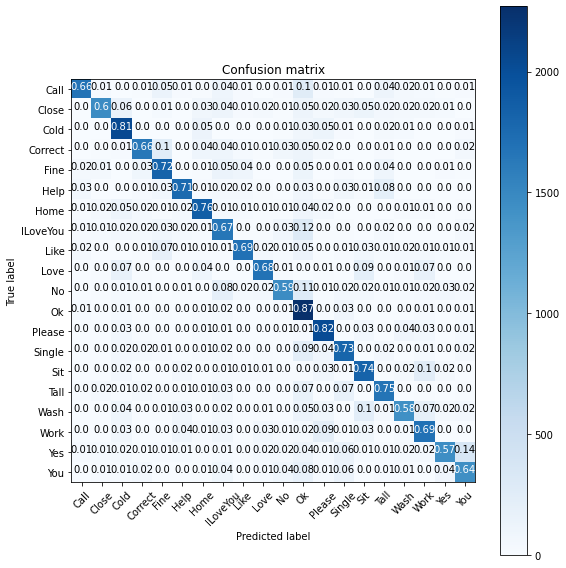

In [ ]:
import sklearn
class_names=['Call', 'Close', 'Cold', 'Correct', 'Fine', 'Help', 'Home', 'ILoveYou', 'Like', 'Love', 'No', 'Ok', 'Please', 'Single', 'Sit', 'Tall', 'Wash', 'Work', 'Yes', 'You']
x_test = x_test.reshape(x_test.shape[0], IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict(x_test, batch_size=128, verbose=0)
#prediction_class=success_rate.predict_classes(x_test, batch_size=128, verbose=0)
rounded_predictions=np.argmax(prediction, axis=1)

# Calculate the confusion matrix using sklearn.metrics
cm = sklearn.metrics.confusion_matrix(y_test_ml, rounded_predictions)
    
figure = plot_confusion_matrix(cm, class_names=class_names)


#cm_image = plot_to_image(figure)

    
    # Log the confusion matrix as an image summary.
#with file_writer_cm.as_default():
      #tf.summary.image("Confusion Matrix", cm_image, step=epoch)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_rf = confusion_matrix(y_test_ml, rounded_predictions)

result1_rf = classification_report(y_test_ml, rounded_predictions)
print("\nClassification Report for pca & random forest:",)
print (result1_rf)



Classification Report for pca & random forest:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      2548
           1       0.83      0.60      0.70      2444
           2       0.67      0.81      0.73      2535
           3       0.79      0.66      0.72      2496
           4       0.68      0.72      0.70      2522
           5       0.80      0.71      0.75      2470
           6       0.74      0.76      0.75      2457
           7       0.58      0.67      0.62      2470
           8       0.82      0.69      0.75      2470
           9       0.79      0.68      0.73      2470
          10       0.76      0.59      0.67      2470
          11       0.48      0.87      0.62      2600
          12       0.70      0.82      0.75      2470
          13       0.67      0.73      0.70      2470
          14       0.66      0.74      0.70      2470
          15       0.68      0.75      0.71      2236
          16       0.75      0.58

In [ ]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


#loss

Training loss: [0.852625214120958, 0.07682183674531552, 0.0372005453245674, 0.025783008246557628, 0.016604040528135612, 0.02083611638977298, 0.013792408852426264, 0.012376658016281902, 0.013459177458055015, 0.010980444493061509, 0.00829250833179783, 0.008839449154522349, 0.009434031375867338, 0.015522407402417972, 0.00456908106361624, 0.010542065200277412, 0.007122092411932976, 0.00673534798993592, 0.006252734197189139, 0.005594309296261941, 0.01127343700104674, 0.006594301256482507, 0.0082321186586014, 0.011061418230270171, 0.009303192547899207, 0.0023962740398698083, 0.009358871253038092, 0.0064684970609378755, 0.006528610042743701, 0.005236002490627334]
Validation loss: [1.9943654648731537, 1.849259997385402, 2.24933030877913, 2.185369046037202, 2.384950199012597, 2.573435763255663, 3.0784774995036024, 2.992371571486329, 2.9484530930457207, 3.268444180882551, 2.6020751723009887, 3.114883528444305, 2.9067343288488687, 2.7504429381657514, 3.202220599747288, 3.6775986460170422, 3.58743

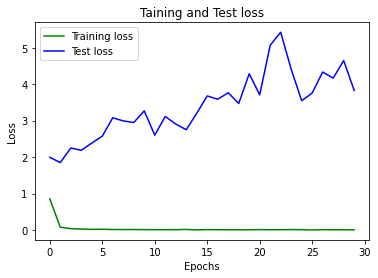

In [ ]:
loss = history.history['loss']
print('Training loss:',loss)

loss_val = history.history['val_loss']
print('Validation loss:',loss_val)

epochs = range(0,30)

plt.plot(epochs, loss, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='Test loss')

plt.title('Taining and Test loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

Accuracy

Training accuracy: [0.7412632703781128, 0.974631130695343, 0.9886099100112915, 0.9915221333503723, 0.9946285486221313, 0.9926223158836365, 0.9946932196617126, 0.9963111281394958, 0.9957934021949768, 0.996440589427948, 0.9975407719612122, 0.9980584979057312, 0.9966994524002075, 0.9956640005111694, 0.9988998174667358, 0.9965053200721741, 0.9979937672615051, 0.9978643655776978, 0.9985114932060242, 0.9985114932060242, 0.9971524477005005, 0.9978643655776978, 0.9976702332496643, 0.9974760413169861, 0.9977349042892456, 0.9994175434112549, 0.9970230460166931, 0.9981879591941833, 0.9983173608779907, 0.9994175434112549]
Test Accuracy [0.5930213928222656, 0.6502372026443481, 0.6763918995857239, 0.6811970472335815, 0.6957949995994568, 0.6857183575630188, 0.69553142786026, 0.6640849709510803, 0.6764121651649475, 0.6592392921447754, 0.682190477848053, 0.6763310432434082, 0.6322128176689148, 0.6956327557563782, 0.6843396425247192, 0.6867726445198059, 0.686671257019043, 0.6923279762268066, 0.707493603

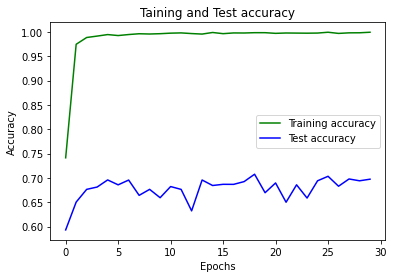

In [ ]:
loss_train = history.history['acc']
print("Training accuracy:", loss_train)
loss_val = history.history['val_acc']
print("Test Accuracy",loss_val)

epochs = range(0,30)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='Test accuracy')

plt.title('Taining and Test accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

[INFO] accuracy: 68.48%
[INFO] Loss: 3.4047387336264427


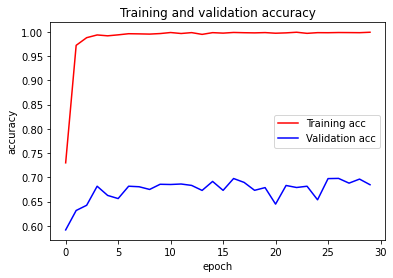

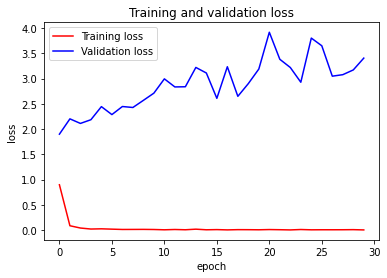

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate(x_test, y_test, batch_size=32,verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 

#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

print('Training Accuracy:', acc)
print("Validation Accuracy:", val_acc)
print("Training Loss:" loss)
print("validation Loss": val_loss)

In [ ]:
pred=np.round(model.predict(x_test),0)
classification_matricse=matrics.classification_report(y_test_ml,pred, target_names=class_names)
print(classification_matricse)

confusion_matrix= confusion_matrix(y_test_ml,pred)

k=plot_confusion_matrix(cm, class_names=class_names)



In [ ]:
from keras.callbacks import TensorBoard
def plot_confusion_matrix(cm, class_names):
    import itertools
    import io
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure
from datetime import datetime
import keras
logdir = "logs/fit" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir = logdir, histogram_freq = 1)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

def plot_to_image(figure):
    import io
    """
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call.
    """
    
    buf = io.BytesIO()
    
    # Use plt.savefig to save the plot to a PNG in memory.
    plt.savefig(buf, format='png')
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Use tf.image.decode_png to convert the PNG buffer
    # to a TF image. Make sure you use 4 channels.
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Use tf.expand_dims to add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image
epoch=10
def log_confusion_matrix(epoch, logs):
    
    # Use the model to predict the values from the test_images.
    test_pred_raw = model.predict(test_images)
    
    test_pred = np.argmax(test_pred_raw, axis=1)
    
    # Calculate the confusion matrix using sklearn.metrics
    cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
    
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)
    
    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)
#cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [ ]:
#Second Confusion Matrix



### https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

CNN architecture: http://alexlenail.me/NN-SVG/LeNet.html

##RNN

In [ ]:
def RNN_model(images,y):
    X=images
    X=X/255.0;
    y=np.array(y)
    print(X.shape)
    print(y.shape)
    from sklearn. model_selection import train_test_split
    x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=109)
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)

    #print(x_train.shape)

    #x_train=x_train.reshape(126000,40,40)
    #x_test=x_test.reshape(54000,40,40)
    #print('shape',x_train.shape)
    #print('shape',x_test.shape)

    model=Sequential()
    #model.add(Dense(256, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(LSTM(128,input_shape=(40,40,3),activation='relu', return_sequences=True)) #input_shape=x_trin.shape[1:]
    model.add(Dropout(0.2))

    #model.add(LSTM(128, return_sequences='true'))
    #model.add(Dropout(0.2))
    model.add(LSTM(128, activation='relu'))
    model.add(Dropout(0.2))

    #model.add(LSTM(32, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    #model.add(LSTM(20, activation='softmax', return_sequences=False))
    model.add(Dense(20, activation='softmax'))
    opt=tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

    model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
    mf=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
    return mf


###run Rnn

In [ ]:
#success_rate=RNN_model(images,y)

#Machine Learning on Augmented dataset

In [ ]:
def classificationsvm(feature_mat,train_label,eval_feature_mat,eval_label):
    print("SVM running....................")
    svm_kernel='RGB'
    svm_c=0.1
    if svm_kernel == 'RGB':
       clf = LinearSVC(C = svm_c, intercept_scaling=1, loss='hinge', max_iter=10000,multi_class='ovr', penalty='l2', random_state=1, tol=0.00001)
    else:
       clf = SVC(svm_c,svm_kernel, degree=10, gamma='auto', coef0=0.0, tol=0.001, cache_size=10000, max_iter=-1, decision_function_shape='ovr')
    clf.fit(feature_mat,train_label)
    success_rate = clf.score(eval_feature_mat,eval_label)
    print("success rate is =", success_rate)
    return success_rate

def classificationrandom(feature_mat,train_label,eval_feature_mat,eval_label):
    print("Random Forest Running....................")
    depth=2
    model=RandomForestClassifier(max_depth=depth,random_state=0,n_estimators=1500)
    model.fit(feature_mat,train_label)
    success_rate = model.score(eval_feature_mat,eval_label)
    #success_rate_2 = model.score(feat_train,labels_train)
    print("success rate is =",success_rate)
    return success_rate

def classificationlogistic(feature_mat,train_label,eval_feature_mat,eval_label):
    print("Logistic Regression running....................")
    clf=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(feature_mat,train_label)
    success_rate = clf.score(eval_feature_mat,eval_label)
    #success_rate_2 = model.score(feat_train,labels_train)
    print("success rate is =",success_rate)
    return success_rate
def classificationbayes(feature_mat,train_label,eval_feature_mat,eval_label):
    print("Bayesian theorem running....................")
    gnb=GaussianNB()
    gnb.fit(feature_mat,train_label)
    success_rate = gnb.score(eval_feature_mat,eval_label)
    #success_rate_2 = model.score(feat_train,labels_train)
    print("success rate is =",success_rate)
    return success_rate
def classificationKnn(feature_mat,train_label,eval_feature_mat,eval_label):
    print("KNN running....................")
    neighbor=4
    neigh = KNeighborsClassifier(n_neighbors=neighbor)
    neigh.fit(feature_mat,train_label)
    success_rate = neigh.score(eval_feature_mat,eval_label)
    print("success rate of KNN is =",success_rate),
    return success_rate


from sklearn.ensemble import GradientBoostingClassifier
def Gboost(feat_train, ytrain, feat_test, label_test):
          print("Gboost Accuracy:=")
          model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
          model.fit(feat_train, ytrain)
          success_rate=model.score(feat_test, label_test)
          print(success_rate)
          return success_rate
          
#Histogram Gradient Boosting
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
def HGboost(x_train, y_train, x_test, y_test):
    print('Histogram Gradient Boosting=')
    model = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
    model.fit(x_train, y_train)
    success_rate = model.score(x_test,y_test)    
    print(success_rate)    
    return success_rate

#Histogram Gradient Boosting With XGBoost
from xgboost import XGBClassifier
def HGboostX(x_train, y_train, x_test, y_test):
    print('Histogram Gradient Boosting With XGBoost=')
    model = XGBClassifier(tree_method='approx', max_bin=255, n_estimators=100)
    model.fit(x_train, y_train)
    success_rate = model.score(x_test,y_test)    
    print(success_rate)    
    return success_rate


from lightgbm import LGBMClassifier
def LightGBM(x_train, y_train, x_test, y_test):
    print("Light GBM Accuracy:=")
    model = LGBMClassifier(learning_rate = 0.001,num_leaves = 255,num_trees = 500,num_threads = 16,min_data_in_leaf = 0,min_sum_hessian_in_leaf = 100)
    model.fit(x_train, y_train)
    success_rate = model.score(x_test,y_test)
    
    print(success_rate)
    yprediction=model.predict(x_test)
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test,  yprediction)
    print("\nConfusion Matrix for pca & random forest:")
    print(cm)
    plot_confusion_matrix(cm, class_names)
    figure = plot_confusion_matrix(cm, class_names=class_names)
    result1_rf = classification_report(y_test,  yprediction)
    
    print("\nClassification Report for pca & random forest:",)
    print (result1_rf)  
    
    return success_rate



# PyRiemann imports
# import pyriemann
# from pyriemann.estimation import XdawnCovariances
# from pyriemann.tangentspace import TangentSpace
# from pyriemann.utils.viz import plot_confusion_matrix
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LogisticRegression

def xdrawnran(X_train,Y_train,X_test,Y_test):
    print(X_train.shape)
    print(Y_train.shape)
    #X_train=X_train[:,0:1506250]
    #X_test=X_test[:,0:1506250]
    #print(X_train.shape)
    #print(X_test.shape)
    print("Xdrawn  running....................")
    kernels, chans, samples = 1, 25, 250
    n_components = 2  # pick some components

    # set up sklearn pipeline
    clf = make_pipeline(XdawnCovariances(n_components),
                       TangentSpace(metric='riemann'),
                       LogisticRegression())
    preds_rg     = np.zeros(len(Y_test))
    # reshape back to (trials, channels, samples)
    X_train      = X_train.reshape(X_train.shape[0], chans, samples)
    X_test       = X_test.reshape(X_test.shape[0], chans, samples)
    print(X_train.shape)
    print(Y_test.shape)

    # train a classifier with xDAWN spatial filtering + Riemannian Geometry (RG)
    # labels need to be back in single-column format
    clf.fit(X_train, Y_train.argmax(axis = -1))
    preds_rg     = clf.predict(X_test)
    # Printing the results
    acc2         = np.mean(preds_rg == Y_test.argmax(axis = -1))
    print("Xdrawn  accuracy: %f " % (acc2))
    return acc2

"""# Xdrawn +**MD**"""

# from matplotlib import pyplot as plt
# from pyriemann.estimation import XdawnCovariances
# from pyriemann.classification import MDM
# from pyriemann.utils.viz import plot_confusion_matrix
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import KFold
# from sklearn.metrics import classification_report

def xdrawnranmd(X_train,Y_train,X_test,Y_test):
    n_components=2
    xamd = make_pipeline(XdawnCovariances(n_components), MDM())
    xamd.fit(X_train, Y_train)
    preds_rg     = np.zeros(len(Y_test))
    preds_rg     = xamd.predict(X_test)
    # Printing the results
    acc8         = np.mean(preds_rg == Y_test.argmax(axis = -1))
    print("Classification accuracy: %f " % (acc8))
    return acc8


#run machine learning


In [ ]:
x_train = x_train.reshape(-1, 10800)
x_test = x_test.reshape(-1, 10800)
y_train=y_train_ml
y_test=y_test_ml
print('x train shape', x_train.shape)
print('y train shape',y_train.shape)
print('x test shape',x_test.shape)
print('y test shape',y_test.shape)
print("Classfication starting")
success_rate=classificationsvm(x_train,y_train,x_test,y_test) # classification algorithm
success_rate=classificationrandom(x_train,y_train,x_test,y_test)  # random forest classification
success_rate=classificationlogistic(x_train,y_train,x_test,y_test)  #logistic regression
success_rate=classificationbayes(x_train,y_train,x_test,y_test);    #Baysian classifier
success_rate=classificationKnn(x_train,y_train,x_test,y_test)     #Knn Classifier
success_rate=Gboost(x_train,y_train,x_test,y_test)  # Gradient Boosting
success_rate=HGboost(x_train,y_train,x_test,y_test) 
success_rate=HGboostX(x_train,y_train,x_test,y_test)   # HistogramGradient Boosting
success_rate=LightGBM(x_train,y_train,x_test,y_test)  # LightGbM

x train shape (13333, 10800)
y train shape (13333,)
x test shape (5715, 10800)
y test shape (5715,)
Classfication starting
SVM running....................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


success rate is = 0.9996500437445319
Random Forest Running....................
success rate is = 0.4027996500437445
Logistic Regression running....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


success rate is = 0.9993000874890638
Bayesian theorem running....................
success rate is = 0.8341207349081364
KNN running....................
success rate of KNN is = 0.9982502187226596
Gboost Accuracy:=


KeyboardInterrupt: ignored

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train = x_train.reshape(-1, 24300)
x_test = x_test.reshape(-1, 24300)
y_train=y_train_ml
y_test=y_test_ml

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12600, 24300)
(5400, 24300)
(12600,)
(5400,)


0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


AttributeError: ignored

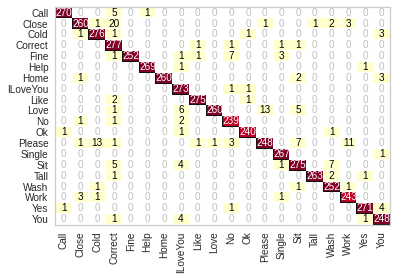

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

def accuracy(y_true, y_pred):
    """精度 (Accuracy) を計算する関数"""
    y_pred = np.rint(y_pred)
    acc = accuracy_score(y_true, y_pred)
    return 'accuracy', acc, True

params = {"learning_rate": 0.8, "n_estimators": 2}
clf = LGBMClassifier(random_state=0, silent=False, **params)
class_names=['Call', 'Close', 'Cold', 'Correct', 'Fine', 'Help', 'Home', 'ILoveYou', 'Like', 'Love', 'No', 'Ok', 'Please', 'Single', 'Sit', 'Tall', 'Wash', 'Work', 'Yes', 'You']
#classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
cm = ConfusionMatrix(clf, classes=class_names,
                     label_encoder={0:'Call',1:'Close',2: 'Cold', 3:'Correct', 4:'Fine',5: 'Help',6:'Home',7:'ILoveYou',8: 'Like', 9:'Love',10:'No',11:'Ok', 12:'Please',13:'Single',14:'Sit',15:'Tall',16:'Wash',17:'Work',18:'Yes',19:'You'})
cm.fit(x_train, y_train)
#clf.fit(x_train, y_train, eval_set=(x_test, y_test))
success_rate = cm.score(x_test,y_test)
print(success_rate)
#yprediction=clf.predict(x_test)
cm.show()

#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#cm = confusion_matrix(y_test,  yprediction)
#print("\nConfusion Matrix for pca & random forest:")
#print(cm)



In [ ]:
cm.show()

AttributeError: ignored


Classification Report for pca & random forest:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       276
           1       0.97      0.90      0.94       288
           2       0.95      0.98      0.96       282
           3       0.88      0.99      0.93       281
           4       1.00      0.95      0.97       265
           5       1.00      0.99      0.99       271
           6       1.00      0.98      0.99       266
           7       0.93      0.99      0.96       275
           8       0.99      0.99      0.99       278
           9       1.00      0.91      0.95       285
          10       0.95      0.98      0.97       243
          11       0.99      0.99      0.99       243
          12       0.95      0.87      0.91       286
          13       0.98      1.00      0.99       268
          14       0.95      0.94      0.94       292
          15       1.00      0.99      0.99       267
          16       0.95      0.99

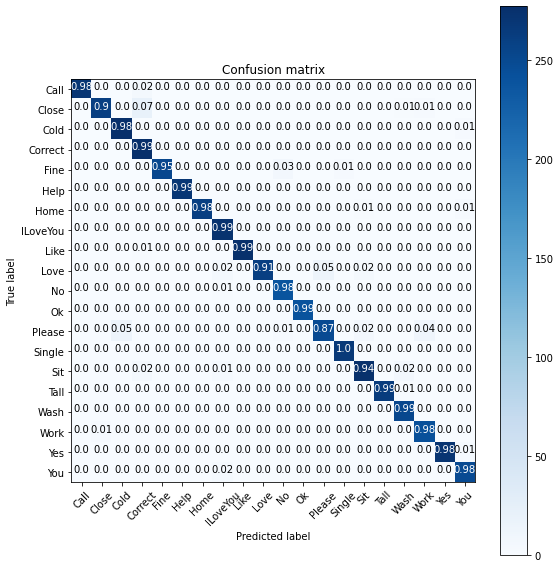

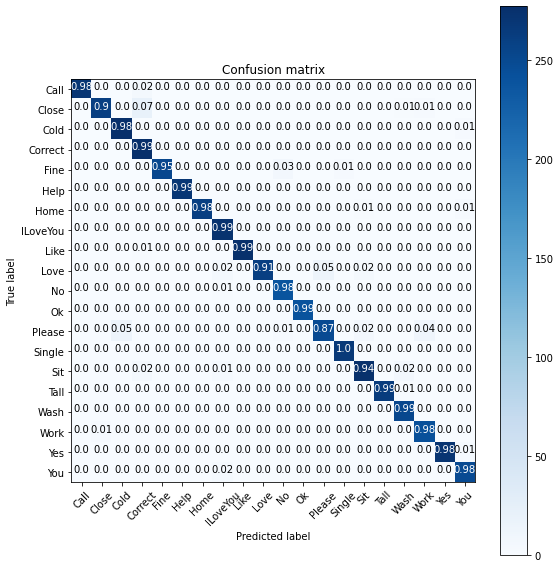

In [ ]:
plot_confusion_matrix(cm, class_names)
figure = plot_confusion_matrix(cm, class_names=class_names)
result1_rf = classification_report(y_test,  yprediction)
    
print("\nClassification Report for pca & random forest:",)
print (result1_rf)  